# Interpolation Method through Radial Basis Functions

#### Primero hay que definir que es interpolación.

Por definición, la interpolación es una técnica que se utiliza para agregar **nuevos puntos de datos** dentro del rango de un conjunto de datos previamente conocidos.

Es decir que la interpolación nos permite rellenar datos faltantes, suavizar datos existentes y hacer predicciones.

Por lo tanto, lo que buscamos es lograr el método de interpolación mediante las llamadas **funciones de base radial**.

Antes de continuar considero importante establecer el término de **peso** en temas de matemáticas. 

Con peso nos referimos a un entero positivo que multiplica un dato cualquiera, lo cual nos indica la importancia de dicho dato dentro de un conjunto.

Por ejemplo del conjunto: $A=\left\{a, b, c, d\right\}$

Si agregamos los pesos $\omega=\left\{2, 3, 1, 4\right\}$

Tal que nos queda $\omega A=\left\{2a,3b,c,4d\right\}$

El dato con mayor peso y por tal, el más influyente, es el dato d

#### Ahora, ¿qué es una función de base radial?

Una función de base radial es una función que depende de la distancia entre un punto ingresado y un punto de referencia.

Es decir que a medida que incrementa o decrementa la distancia entre el punto que se ingresa y el punto de referencia establecido, el valor de la función cambia de la misma manera.

Una RBF muy común es la función gaussiana, la cual ejemplifica este comportamiento de manera muy sencilla:

$$
\phi(x, x_j) = e^{- \dfrac{||x-x_{j}||^{2}}{2\sigma^{2}}}
$$

In [6]:
!jt -t solarizedd

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

plt.style.use('ggplot')

colors = ['deepskyblue', 'darkorange', 'springgreen', 'red', 'mediumorchid', 'peru']

In [8]:
# Kernel gaussiano
def gaussian(x, x_j, r):
    return np.e**(-abs(x-x_j)**2/(2*r)**2)

sigma = 1 # Parámetro de suavizado

x_values = np.linspace(-10, 10, 100) 
y_values = gaussian(x_values, 0, sigma)

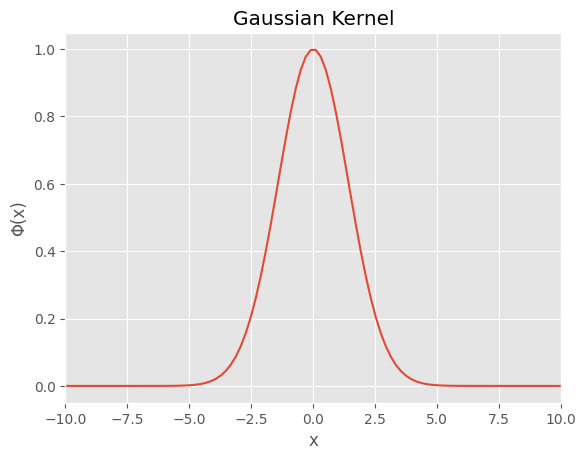

In [4]:
# Gráfica de la función gaussiana
plt.plot(x_values, y_values)
plt.xlim([-10, 10])
plt.title('Gaussian Kernel')
plt.xlabel('x')
plt.ylabel('Φ(x)')
plt.show()

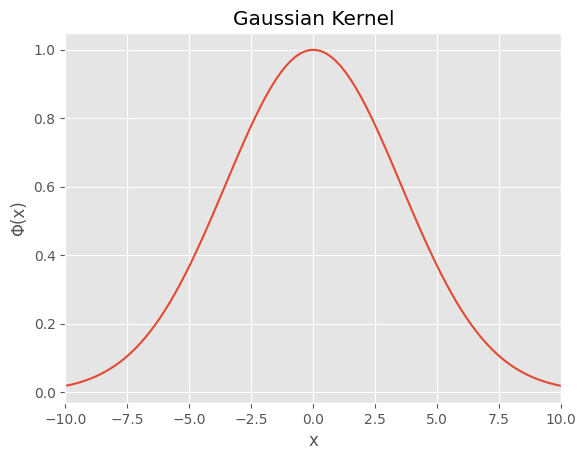

In [4]:
sigma = 2.5  # Parámetro de suavizado

x_values = np.linspace(-10, 10, 100)
y_values = gaussian(x_values, 0, sigma)
# Gráfica de la función gaussiana
plt.plot(x_values, y_values)
plt.xlim([-10, 10])
plt.title('Gaussian Kernel')
plt.xlabel('x')
plt.ylabel('Φ(x)')
plt.show()

sigma = 1  # Parámetro de suavizado

### Interpolación mediante RBF

Dado las siguientes medidas de temperatura...

In [5]:
temp = np.array([20, 18, 23, 22, 21, 19])

Para las posiciones...

In [6]:
position = np.array([1, 2, 3, 4, 5, 6])

In [7]:
mediciones = pd.DataFrame({'Posicion': position, 'Temperatura': temp})
mediciones.set_index('Posicion', inplace=True)

mediciones

NameError: name 'pd' is not defined

Se tiene la siguiente gráfica de dispersión de los datos medidos.

In [ ]:
plt.vlines(position, 0, temp, linestyle="dashed", color="black", alpha=0.5)
plt.hlines(temp, 0, position, linestyle="dashed", color="black", alpha=0.5)
plt.scatter(position, temp)
plt.xlim(0, 7)
plt.ylim(0, 24)
plt.title('Temperatura / Posicion')
plt.xlabel('Posicion')
plt.ylabel('Temperatura')
plt.show()

Si queremos identificar la temperatura en la posición 1.7, tendremos que utilizar la interpolación y podemos aplicar el método de RBF.

Para ello definimos nuestra función de interpolación gaussiana tal como se mencionó anteriormente y las centramos en las posiciones de los datos medidos.

In [ ]:
sigma = 0.2

for (pos, col) in zip(position, colors):
    x_values = np.linspace(pos-2, pos+2, 200)
    plt.plot(x_values, gaussian(x_values, pos, sigma), color=col)
    
    plt.vlines(pos, 0, 1, linestyle="dashed", color=col)
    
    plt.xlim(0, 7)
    plt.ylim(0, 1.05)

Ahora debemos de agregar los pesos a las RBF, lo que podría verse como ajustar la altura de cada función para que corresponda con las temperaturas medidas.

In [ ]:
for (pos, col, t) in zip(position, colors, temp):
    x_values = np.linspace(pos-2, pos+2, 200)
    plt.plot(x_values, t*gaussian(x_values, pos, sigma), color=col)
    
    plt.vlines(pos, 0, t, linestyle="dashed", color=col)
    plt.hlines(t, 0, pos, linestyle="dashed", color=col)
    
    plt.xlim(0, 7)
    plt.ylim(0, 24)

Finalmente, sumamos todas las funciones de base radial para obtener la función interpolada.

In [ ]:
# RBF centradas y pesadas en las posiciones de diferentes colores...
for (pos, col, t) in zip(position, colors, temp):
    x_values = np.linspace(pos-2, pos+2, 200)
    plt.plot(x_values, t*gaussian(x_values, pos, sigma), color=col)
    
    plt.vlines(pos, 0, t, linestyle="dashed", color=col)
    plt.hlines(t, 0, pos, linestyle="dashed", color=col)
    
    plt.xlim(0, 7)
    plt.ylim(0, 24)

# Suma de todas las RBF...
def interpolate(x, r):
    y = 0
    for (pos, t) in zip(position, temp):
        y += t*gaussian(x, pos, r)
    return y

x_values = np.linspace(0, 7, 400)
y_values = [interpolate(x, sigma) for x in x_values]

plt.plot(x_values, y_values, color='black')
plt.show()

Como se puede observar, posiblemente el comportamiento de la función interpolada no sea el esperado, esto se debe a que la función de base radial no es la más adecuada para este caso o que el valor de sigma no es el correcto.

Sí ajustamos sigma para suavizar la función interpolada...

In [ ]:
sigma = 0.3

# RBF pesadas y centradas en las posiciones de diferentes colores...
for (pos, col, t) in zip(position, colors, temp):
    x_values = np.linspace(pos-2, pos+2, 200)
    plt.plot(x_values, t*gaussian(x_values, pos, sigma), color=col, alpha=0.25)
    
    plt.vlines(pos, 0, t, linestyle="dashed", color=col)
    plt.hlines(t, 0, pos, linestyle="dashed", color=col)
    
    plt.xlim(0, 7)
    plt.ylim(0, 27)

# Suma de todas las RBF pesadas...
def interpolate(x, r):
    y = 0
    for (pos, t) in zip(position, temp):
        y += t*gaussian(x, pos, r)
    return y

x_values = np.linspace(0, 7, 400)
y_values = [interpolate(x, sigma) for x in x_values]

plt.plot(x_values, y_values, color='black')

Se puede observar que si incrementamos el radio (sigma) de las RBF, estas empiezan a sobreponerse y la interpolación es errónea.

Por lo que hay que ajustar los pesos de las RBF en cada punto para un sigma dado.

Para este ejemplo tenemos el polinomio de interpolación:

$$
\tilde{f}(x) = \omega_1\Phi(x, 1) + \omega_2\Phi(x, 2) + \omega_3\Phi(x, 3) + \omega_4\Phi(x, 4) + \omega_5\Phi(x, 5) + \omega_6\Phi(x, 6) = f(x)
$$

En donde debemos de encontrar los pesos $\omega$ que minimicen el error cuadrático medio.

Se define el sistema de ecuaciones con respecto a los valores de $f(x)$ que serían los valores de temperatura medidos para su correspondiente posición:

$$
\begin{align*}
\tilde{f}(x_1) = \omega_1\Phi_{1, 1} + \omega_2\Phi_{1, 2} + \omega_3\Phi_{1, 3} + \omega_4\Phi_{1, 4} + \omega_5\Phi_{1, 5} + \omega_6\Phi_{1, 6} = f_1 \\
\tilde{f}(x_2) = \omega_1\Phi_{2, 1} + \omega_2\Phi_{2, 2} + \omega_3\Phi_{2, 3} + \omega_4\Phi_{2, 4} + \omega_5\Phi_{2, 5} + \omega_6\Phi_{2, 6} = f_2 \\
\tilde{f}(x_3) = \omega_1\Phi_{3, 1} + \omega_2\Phi_{3, 2} + \omega_3\Phi_{3, 3} + \omega_4\Phi_{3, 4} + \omega_5\Phi_{3, 5} + \omega_6\Phi_{3, 6} = f_3 \\
\tilde{f}(x_4) = \omega_1\Phi_{4, 1} + \omega_2\Phi_{4, 2} + \omega_3\Phi_{4, 3} + \omega_4\Phi_{4, 4} + \omega_5\Phi_{4, 5} + \omega_6\Phi_{4, 6} = f_4 \\
\tilde{f}(x_5) = \omega_1\Phi_{5, 1} + \omega_2\Phi_{5, 2} + \omega_3\Phi_{5, 3} + \omega_4\Phi_{5, 4} + \omega_5\Phi_{5, 5} + \omega_6\Phi_{5, 6} = f_5 \\
\tilde{f}(x_6) = \omega_1\Phi_{6, 1} + \omega_2\Phi_{6, 2} + \omega_3\Phi_{6, 3} + \omega_4\Phi_{6, 4} + \omega_5\Phi_{6, 5} + \omega_6\Phi_{6, 6} = f_6
\end{align*}
$$

Es decir que deberemos de considerar la contribución de todas las RBF para cada posición, por ejemplo en la gráfica anterior observamos que la RBF en la posición 3 se sobrepone con las RBF en las posiciones 2 y 4.

In [ ]:
for (pos, col, t) in zip(position[1:4], colors[1:4], temp[1:4]):
    x_values = np.linspace(pos-2, pos+2, 300)
    
    shown = [x for x in x_values if 2.453 < x < 3.51]
    lower = [x for x in x_values if x < 2.453]
    upper = [x for x in x_values if x > 3.51]
    
    if pos == 3:
        plt.plot(x_values, t*gaussian(x_values, pos, sigma), color=col)
    else:
        plt.plot(shown, t*gaussian(shown, pos, sigma), color=col)
        plt.plot(lower, t*gaussian(lower, pos, sigma), color=col, alpha=0.15)
        plt.plot(upper, t*gaussian(upper, pos, sigma), color=col, alpha=0.15)
    
    
    plt.vlines(pos, 0, t, linestyle="dashed", color=col, alpha=0.25)
    
    plt.xlim(1.75, 4.25)
    plt.ylim(0, 24)

Es por ello que debemos de establecer una ecuación por RBF para verificar la contribución de cada posición dando como resultado un sistema de tamaño 6x6 (NxN posiciones).

El sistema propuesto previamente se puede reescribir de manera matricial como:

$$
\left[
\begin{array}{cccccc}
\Phi_{1, 1} & \Phi_{1, 2} & \Phi_{1, 3} & \Phi_{1, 4} & \Phi_{1, 5} & \Phi_{1, 6} \\
\Phi_{2, 1} & \Phi_{2, 2} & \Phi_{2, 3} & \Phi_{2, 4} & \Phi_{2, 5} & \Phi_{2, 6} \\
\Phi_{3, 1} & \Phi_{3, 2} & \Phi_{3, 3} & \Phi_{3, 4} & \Phi_{3, 5} & \Phi_{3, 6} \\
\Phi_{4, 1} & \Phi_{4, 2} & \Phi_{4, 3} & \Phi_{4, 4} & \Phi_{4, 5} & \Phi_{4, 6} \\
\Phi_{5, 1} & \Phi_{5, 2} & \Phi_{5, 3} & \Phi_{5, 4} & \Phi_{5, 5} & \Phi_{5, 6} \\
\Phi_{6, 1} & \Phi_{6, 2} & \Phi_{6, 3} & \Phi_{6, 4} & \Phi_{6, 5} & \Phi_{6, 6} \\
\end{array}
\right]

\left[
\begin{array}{c}
\omega_1 \\
\omega_2 \\
\omega_3 \\
\omega_4 \\
\omega_5 \\
\omega_6 \\
\end{array}
\right]

=

\left[
\begin{array}{c}
f_1 \\
f_2 \\
f_3 \\
f_4 \\
f_5 \\
f_6 \\
\end{array}
\right]
$$

Es decir que de manera general tenemos un sistema de la forma:

$$
\Phi \omega = f
$$

Sí hacemos la comparación con la forma general de una ecuación matricial:

$$
Ax = b
$$

Podemos encontrar la solución al sistema planteado mediante la inversa de la matriz $\Phi$:

$$
\omega = \Phi^{-1} f
$$

Recordando que la matriz $\Phi$ es constante, puesto que se compone de la RBF Gaussiana evaluada para las diferentes posiciones. 

Se debe establecer que la matriz $\Phi$ es simétrica y definida positiva, por lo que su inversa existe. Además, la matriz $\Phi$ es no singular, por lo que su determinante es distinto de cero.

In [ ]:
sigma = 0.4

# Solución del sistema de ecuaciones...
omega = np.linalg.solve(np.array([gaussian(position, pos, sigma) for pos in position]).T, temp)

# Polinomio interpolado con los pesos adecuados...
def interpolate(x, r):
    y = 0
    for (pos, w) in zip(position, omega):
        y += w*gaussian(x, pos, r)
    return y

x_values = np.linspace(0, 7, 400)
y_values = [interpolate(x, sigma) for x in x_values]

plt.plot(x_values, y_values, color='black')

# Puntos de dispersión...
plt.scatter(position, temp)

# RBF centradas y pesadas en las posiciones de diferentes colores...
for (pos, col, t) in zip(position, colors, temp):
    x_values = np.linspace(pos-4, pos+4, 200)
    plt.plot(x_values, t*gaussian(x_values, pos, sigma), color=col, alpha=0.25)

plt.xlim(0, 7)
plt.ylim(0, 24)

plt.show()

Ahora podemos observar que la función interpolada se ajusta de manera correcta a los datos medidos sin importar el valor de sigma.

In [ ]:
sigma = 0.4

def interpolate(x, r, omega):
    y = 0
    for (pos, w) in zip(position, omega):
        y += w*gaussian(x, pos, r)
    return y

def interactive_plot(sigma):
    omega = np.linalg.solve(np.array([gaussian(position, pos, sigma) for pos in position]).T, temp)
    x_values = np.linspace(0, 8, 400)
    y_values = [interpolate(x, sigma, omega) for x in x_values]

    plt.plot(x_values, y_values, color='black')

    plt.scatter(position, temp)
    
    
    for (pos, col, t) in zip(position, colors, temp):
        x_values = np.linspace(pos-7, pos+7, 400)
        plt.plot(x_values, t*gaussian(x_values, pos, sigma), color=col, alpha=0.25)
    
    plt.xlim(0, 8)
    plt.ylim(0, 24)
    
    plt.show()

interact(interactive_plot, sigma=(0.001, 2, 0.001))